# Voorbereiding eindopdracht

In [4]:
import pandas as pd

dataset = pd.read_csv('./Dataset/overstimulation_dataset.csv')
dataset.head()

,Age,Sleep_Hours,Screen_Time,Stress_Level,Noise_Exposure,Social_Interaction,Work_Hours,Exercise_Hours,Caffeine_Intake,Multitasking_Habit,Anxiety_Score,Depression_Score,Sensory_Sensitivity,Meditation_Habit,Overthinking_Score,Irritability_Score,Headache_Frequency,Sleep_Quality,Tech_Usage_Hours,Overstimulated
0,56,7.767825,4.908517,2,0,8,11,2.054411,4,0,6,8,3,1,1,8,1,2,8.746524,0
1,46,4.270068,8.413936,9,4,4,10,2.513216,3,1,4,4,2,1,5,5,2,4,8.508448,1
2,32,6.676144,1.688213,5,2,8,12,2.123108,2,1,4,3,2,1,8,7,2,4,5.701592,0
3,25,7.963324,3.315576,7,2,8,13,1.217663,3,1,3,4,0,1,4,4,2,1,9.131087,0
4,38,3.748138,9.899260,5,0,5,4,0.093407,4,0,9,4,0,1,2,9,5,3,2.286433,1


# Maten

## Centrummaten

In [5]:
# Gemiddelde berekenen
mean = dataset.mean().round(2)

# modus
mode = dataset.mode().iloc[0].round(2)

# mediaan
median = dataset.median().round(2)

# mean, mode en median in een tabel visueel weergeven
summary = pd.DataFrame({
    'mean': mean,
    'mode': mode,
    'median': median
})
summary

,mean,mode,median
Age,38.70,43.00,39.00
Sleep_Hours,6.50,3.00,6.54
Screen_Time,6.40,1.00,6.31
Stress_Level,4.99,9.00,5.00
Noise_Exposure,2.05,4.00,2.00
Social_Interaction,4.52,5.00,5.00
Work_Hours,8.92,7.00,9.00
Exercise_Hours,1.51,0.00,1.53
Caffeine_Intake,1.96,0.00,2.00
Multitasking_Habit,0.51,1.00,1.00


## Spreidingsmaten

In [6]:
# range = max- min
range = (dataset.max() - dataset.min()).round(2)

# standaardafwijking
std = dataset.std().round(2)

# uitschieters
outliers = dataset[dataset > (dataset.mean() + 2 * dataset.std())].dropna(how='all')
# outliers => geen uitschieters

# IQR
q1 = dataset.quantile(0.25)
q3 = dataset.quantile(0.75)
iqr = (q3 - q1).round(2)

summary = pd.DataFrame({
    'range': range,
    'std': std,
    'IQR': iqr
})

summary

,range,std,IQR
Age,41.00,12.07,21.00
Sleep_Hours,6.99,2.02,3.48
Screen_Time,10.99,3.14,5.40
Stress_Level,8.00,2.63,4.00
Noise_Exposure,4.00,1.43,2.00
Social_Interaction,9.00,2.85,5.00
Work_Hours,10.00,3.14,6.00
Exercise_Hours,3.00,0.86,1.48
Caffeine_Intake,4.00,1.43,2.00
Multitasking_Habit,1.00,0.50,1.00


# Preprocessing

Preprocessing steps:
- 1. Controle op missende waarden.
        => Geen nullwaarden gevonden.
- 2. Controle op outliers.
        => Geen outliers gevonden.
- 3. Data normaliseren zodat alle waarden tussen 0 en 1 liggen.
        => Gedaan met Min-Max scaling.
- 4. Controle op feature colleratie.

In [7]:
# 1 Missing values
null_values = dataset.isnull().sum()
null_values

Age                    0
Sleep_Hours            0
Screen_Time            0
Stress_Level           0
Noise_Exposure         0
Social_Interaction     0
Work_Hours             0
Exercise_Hours         0
Caffeine_Intake        0
Multitasking_Habit     0
Anxiety_Score          0
Depression_Score       0
Sensory_Sensitivity    0
Meditation_Habit       0
Overthinking_Score     0
Irritability_Score     0
Headache_Frequency     0
Sleep_Quality          0
Tech_Usage_Hours       0
Overstimulated         0
dtype: int64

In [8]:
# 2 Outliers
outliers = dataset[dataset > (dataset.mean() + 2 * dataset.std())].dropna(how='all')
outliers

,Age,Sleep_Hours,Screen_Time,Stress_Level,Noise_Exposure,Social_Interaction,Work_Hours,Exercise_Hours,Caffeine_Intake,Multitasking_Habit,Anxiety_Score,Depression_Score,Sensory_Sensitivity,Meditation_Habit,Overthinking_Score,Irritability_Score,Headache_Frequency,Sleep_Quality,Tech_Usage_Hours,Overstimulated


In [10]:
# 3 Normaliseren
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dataset[['Stress_Level','Noise_Exposure', 'Anxiety_Score', 'Depression_Score', 'Sensory_Sensitivity', 'Overthinking_Score', 'Irritability_Score', 'Sleep_Quality']] = scaler.fit_transform(dataset[['Stress_Level','Noise_Exposure', 'Anxiety_Score', 'Depression_Score', 'Sensory_Sensitivity', 'Overthinking_Score', 'Irritability_Score', 'Sleep_Quality']])
# show only those columns
dataset[['Stress_Level','Noise_Exposure', 'Anxiety_Score', 'Depression_Score', 'Sensory_Sensitivity', 'Overthinking_Score', 'Irritability_Score', 'Sleep_Quality']].head()

,Stress_Level,Noise_Exposure,Anxiety_Score,Depression_Score,Sensory_Sensitivity,Overthinking_Score,Irritability_Score,Sleep_Quality
0,0.125,0.0,0.625,0.875,0.75,0.000,0.875,0.333333
1,1.000,1.0,0.375,0.375,0.50,0.500,0.500,1.000000
2,0.500,0.5,0.375,0.250,0.50,0.875,0.750,1.000000
3,0.750,0.5,0.250,0.375,0.00,0.375,0.375,0.000000
4,0.500,0.0,1.000,0.375,0.00,0.125,1.000,0.666667


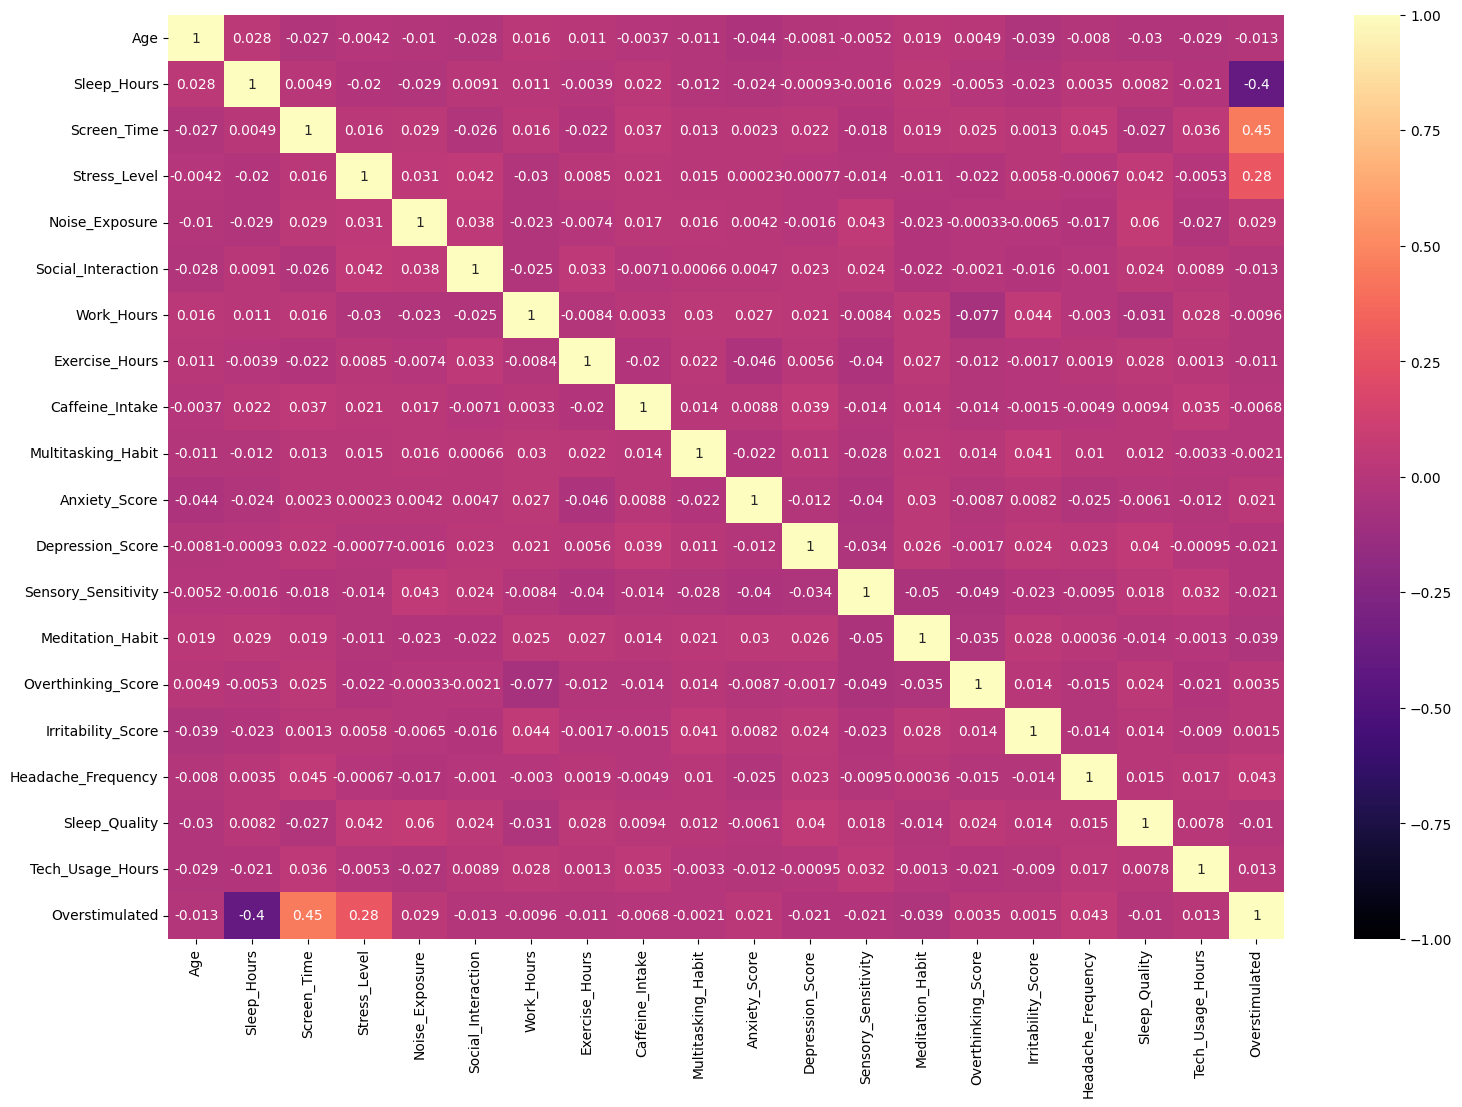

In [12]:
# 4 feature correlatie met heatmap
import seaborn as sns
import matplotlib.pyplot as plt

correlation = dataset.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap='magma')
plt.show()

# Plotjes

De 4 zinvolle plots die ik ga maken zijn:
- 1. Violin plots voor ordinale data.
- 2. Pie chart voor nominale data.
- 3. Density plot voor continue data.
- 4. Histogram voor discrete data.
- 5. Heatmap van de correlatie (zie ook vorig deel)

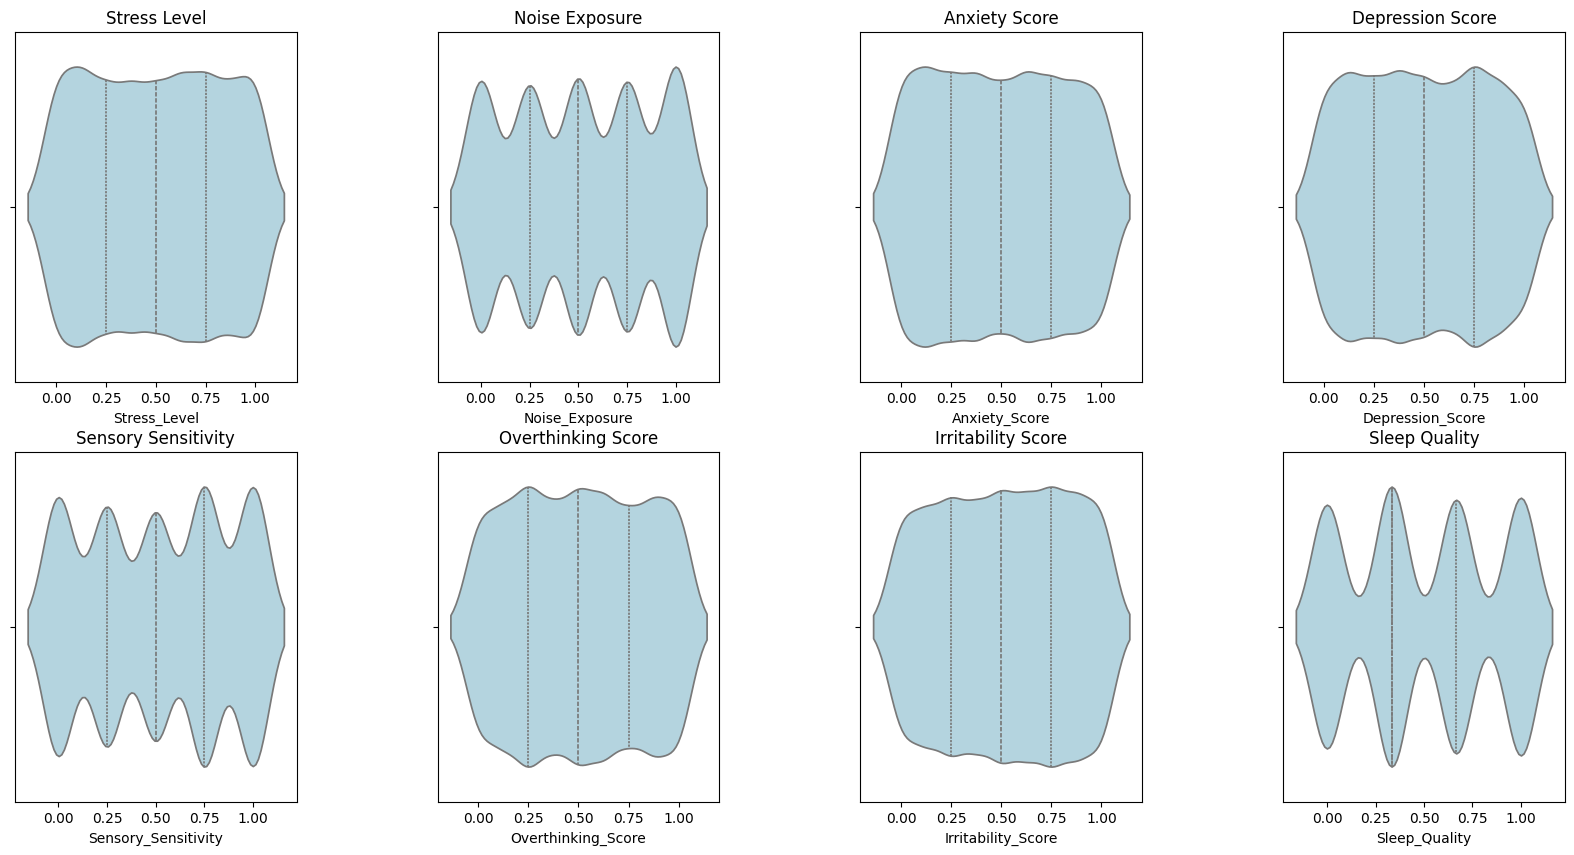

In [ ]:
# 1 Violin plot
# voor stress level, noise exposure, anxiety score, depression score, sensory sensitivity, overthinking score, irritability score en sleep quality
features = [
    'Stress_Level', 'Noise_Exposure', 'Anxiety_Score', 'Depression_Score',
    'Sensory_Sensitivity', 'Overthinking_Score', 'Irritability_Score', 'Sleep_Quality'
]

plt.figure(figsize=(20, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.violinplot(x=feature, data=dataset, color='lightblue', inner="quart")
    plt.title(feature.replace('_', ' '))

plt.subplots_adjust(wspace=0.5)
plt.show()


In [ ]:
# Controle van wat ja en nee is
# count = dataset['Multitasking_Habit'].value_counts()
# count = dataset['Meditation_Habit'].value_counts()
count = dataset['Overstimulated'].value_counts()

# 0 is no, 1 is yes
no = int(count[0])
yes = int(count[1])

no, yes

(725, 1275)

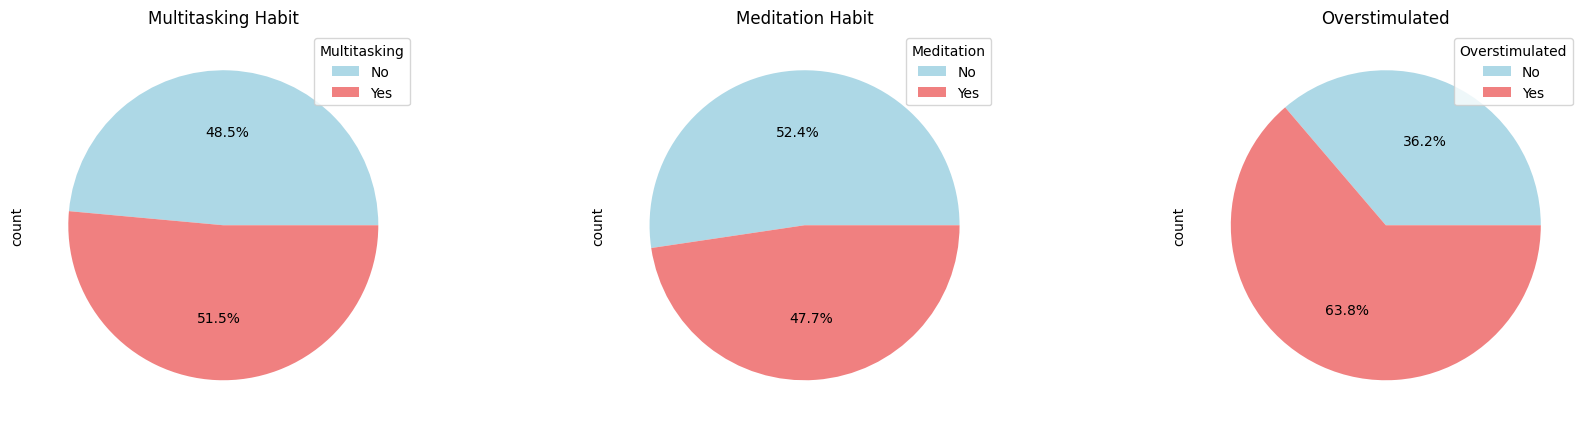

In [ ]:
# 2 Pie chart
# voor multitasking habit, meditation habit, overstimulated
features = ['Multitasking_Habit', 'Meditation_Habit', 'Overstimulated']

plt.figure(figsize=(20, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    dataset[feature].value_counts().reindex([0, 1]).plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], labels=None)
    plt.title(feature.replace('_', ' '))
    title = feature.split('_')[0]
    plt.legend(['No', 'Yes'], loc='upper right', title=title)

plt.subplots_adjust(wspace=0.5)
plt.show()

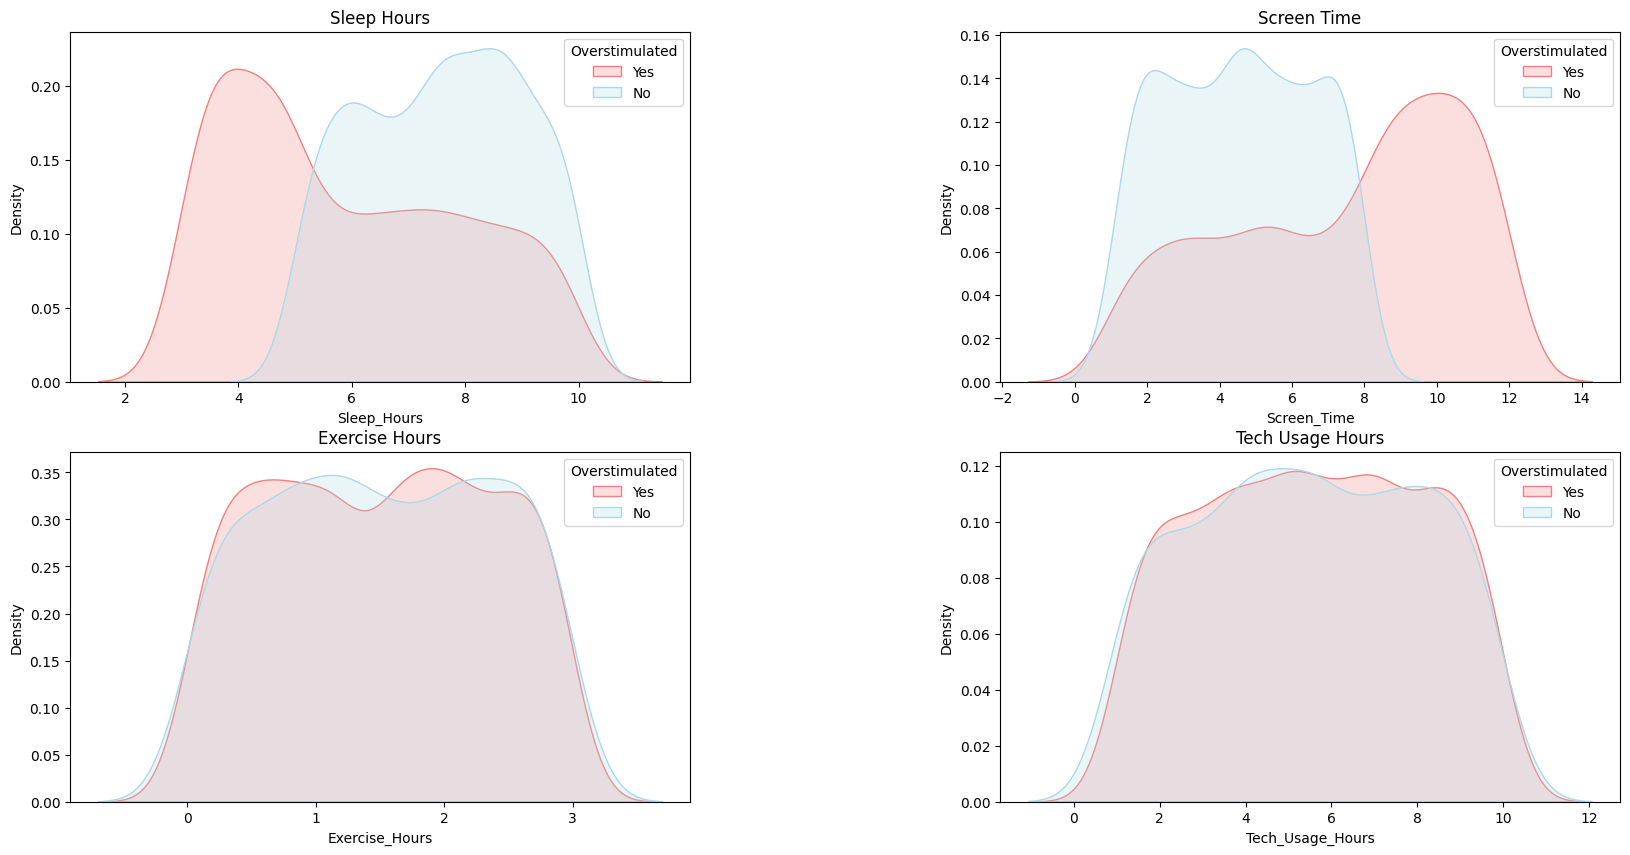

In [ ]:
# 3 Density plot
# voor sleep hours, screen time, exercise hours, tech usage hours
features = ['Sleep_Hours', 'Screen_Time', 'Exercise_Hours', 'Tech_Usage_Hours']

plt.figure(figsize=(20, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=dataset, x=feature, hue='Overstimulated', fill=True, common_norm=False, palette=['lightblue', 'lightcoral'])
    plt.title(feature.replace('_', ' '))
    plt.legend(['Yes', 'No'], loc='upper right', title='Overstimulated')

plt.subplots_adjust(wspace=0.5)
plt.show()

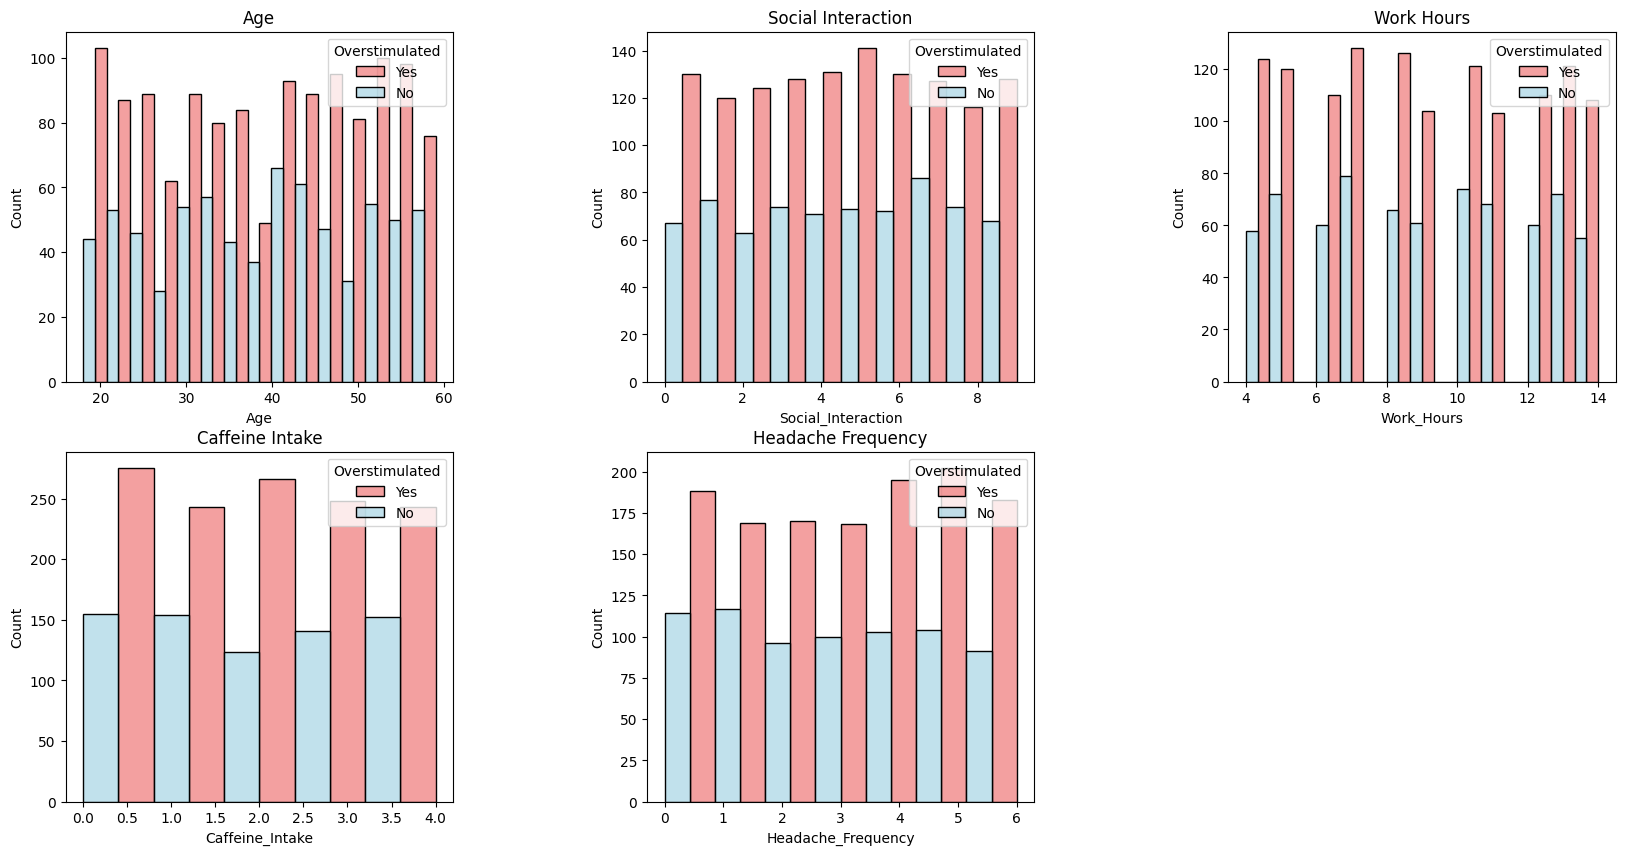

In [ ]:
# 4 Histogram
# voor age, social interaction, work hours, caffeine intake, headache frequency
features = ['Age', 'Social_Interaction', 'Work_Hours', 'Caffeine_Intake', 'Headache_Frequency']
bins_list = [15, 10, 15, 5, 7]

plt.figure(figsize=(20, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    bins = bins_list[i - 1]
    sns.histplot(data=dataset, x=feature, hue='Overstimulated', bins=bins, palette=['lightblue', 'lightcoral'], multiple='dodge')
    plt.title(feature.replace('_', ' '))
    plt.legend(['Yes', 'No'], loc='upper right', title='Overstimulated')

plt.subplots_adjust(wspace=0.5)
plt.show()

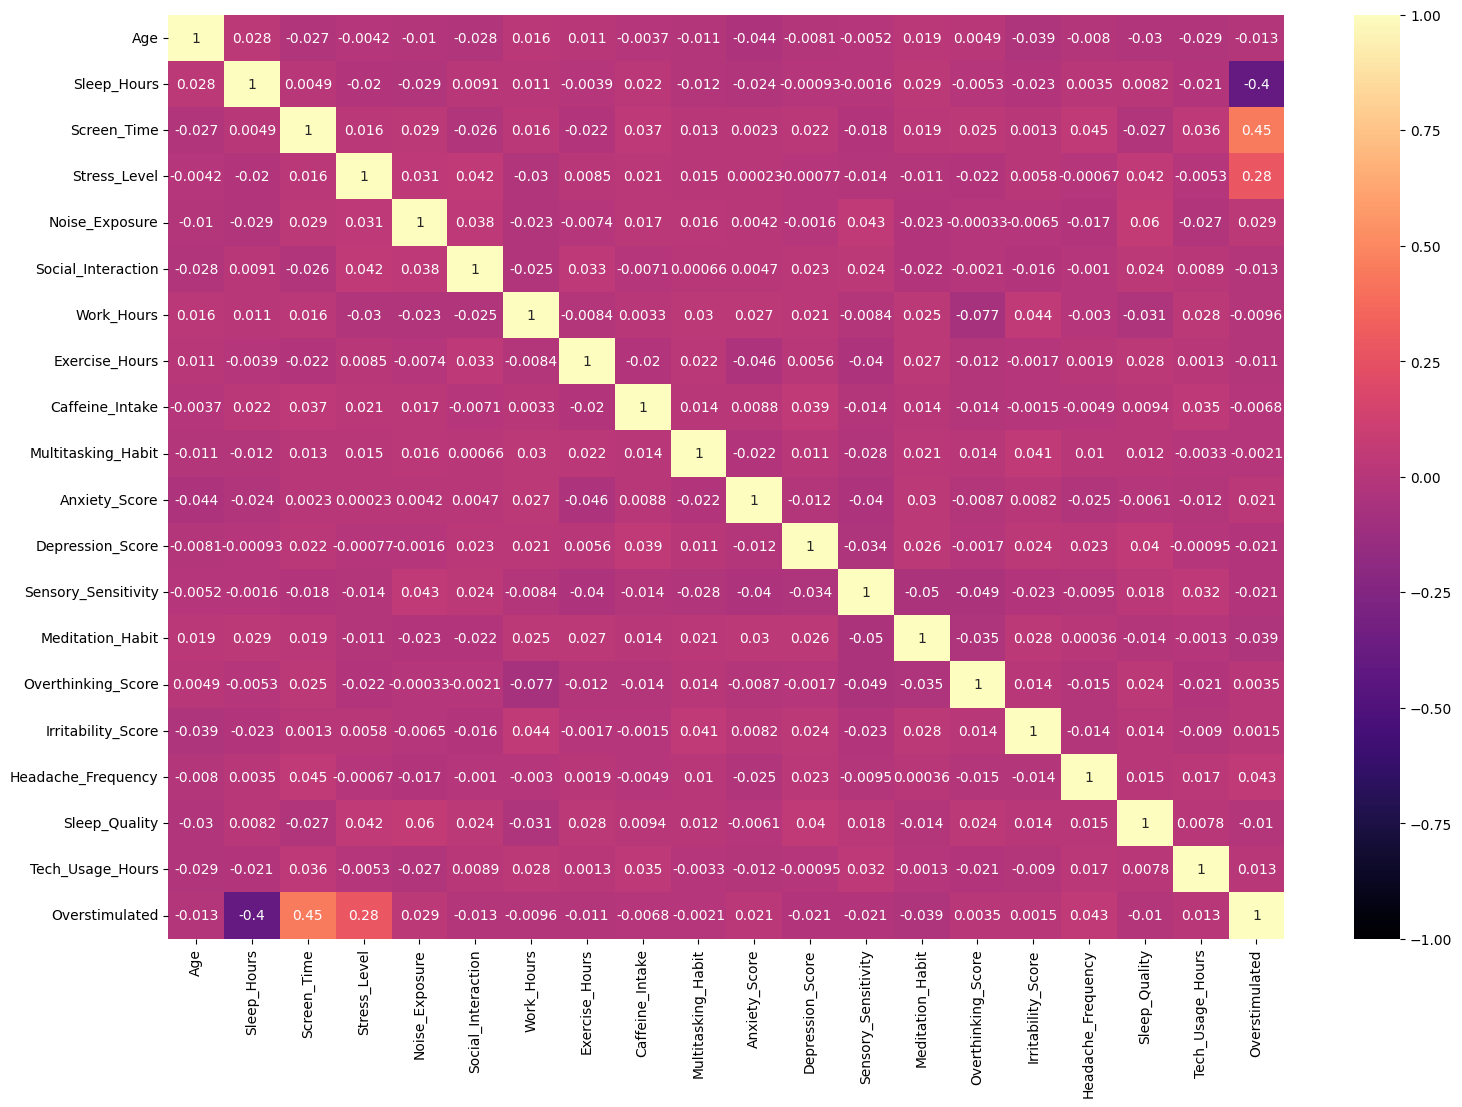

In [ ]:
# 5 Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

correlation = dataset.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap='magma')
plt.show()